## Algoritmos de Aprendizaje - Aprendizaje NO supervisado
<img src='imgs/fancy_process.png' alt="Smiley face" width="900"><br>
>  Recuerde:  En machine learning, el problema de un aprendizaje NO supervisado es el que trata de encontrar estructuras ocultas en datos que aún no han sido etiquetados. Debido a que el conjunto de entrenamiento (training set) dado al aprendiz no ha sido etiquetado, no hay error o garantía para evaluar una solución potencial. Basicamente, lo que se trata es de encontrar in medio de representar los datos y obtener la máxima cantidad de información que sea posible. 

Oye!  Recuerdas el algmoritmo PCA?  El PCA es considerado un algoritmo de aprendizaje NO supervisado.  Lo presentamos antes arriba porque es un buen medio para visualizar datos al inicio de un proceso de ML.

Revisémoslo en más detalle usando el `iris` dataset.

In [1]:
# Imports para compatibilidad entre python 2 y 3

from __future__ import absolute_import, division, print_function, unicode_literals

# Para python 2, commente esta línea:
# from builtins import range

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Repaso de PCA 

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()

# subconjunto de datos que contiene solo el ancho del sépalo (cm) y el largo del pétalo (cm) para hacerlo más simple
X = iris.data[:, 1:3]
print(iris.feature_names[1:3])

pca = PCA(n_components = 2)
pca.fit(X)

print("% de varianza atribuida a los componentes: "+ \
      ', '.join(['%.2f' % (x * 100) for x in pca.explained_variance_ratio_]))
print('\ncomponentes de cada característica:', pca.components_)

print(list(zip(pca.explained_variance_, pca.components_)))

['sepal width (cm)', 'petal length (cm)']
% de varianza atribuida a los componentes: 95.36, 4.64

componentes de cada característica: [[-0.10804539  0.99414596]
 [ 0.99414596  0.10804539]]
[(3.1481436790726476, array([-0.10804539,  0.99414596])), (0.15303976611750947, array([0.99414596, 0.10804539]))]


La `pca.explained_variance_` es como la magnitud de la influencia de un componenete (cantidad de varianza explicada) y el `pca.components_` es como la dirección de influencia de cada una de las características en cada componente.

<p style="text-align:right"><i>Adaptación del código en la siguiente celda basado en el código de Jake VanderPlas [Aquí](https://github.com/jakevdp/sklearn_pycon2015)</i></p>

[3.0540000000000007, 2.4788849203732544] [3.7586666666666693, 9.050408889870646]
[3.0540000000000007, 4.2207385683162535] [3.7586666666666693, 3.885469696050539]


Text(0,0.5,'petal length (cm)')

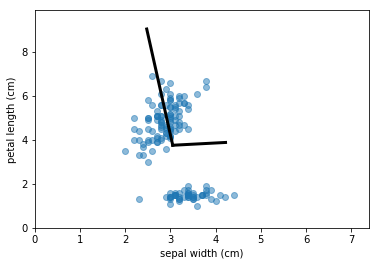

In [8]:
# Graficar datos original en X (antes de PCA)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)

# Agarrar los componentes de las medias para obtener el punto central y para graficarlo más abajo
means = pca.mean_

# Aqui usaremos la dirección de los componentes en pca.components_
#  y la magnitud de la varianza explicada por ese componente en
#  pca.explained_variane_

# Graficaremos el vector (magnitud y dirección) de los componentes
# sobre el conjunto de datos original de X
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print([means[0], v[0]+means[0]], [means[1], v[1]+means[1]])
    plt.plot([means[0], v[0]+means[0]], [means[1], v[1]+means[1]], '-k', lw=3)


# limites de los ejes
plt.xlim(0, max(X[:, 0])+3)
plt.ylim(0, max(X[:, 1])+3)

# etiquetas originales de las característica de los datos X
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

Pregunta:  ¿En cual dirección se encuentra la mayor varianza explicada?

Recuerde que en el módule 101 de ML: modelos NO supervisados tienen un `fit()`, `transform()` y/o `fit_transform()` en `sklearn`.


Si usted quiere que ambos obtegan un ajuste y un nuevo dataset con dimensionalidad reducida, ¿cual función usaría? (agregue el código en el espacio en blanco)

In [19]:
# Volviendo al dataset 4D
X, y = iris.data, iris.target

pca = PCA(n_components = 0.95) # Mantenga el 95% de la varianza
X_trans = pca.fit_transform(X) # <- espacio en blanco para la función seleccionada
print(X.shape)
print(X_trans.shape)

(150, 4)
(150, 2)


Text(0.5,0,'Component 1')

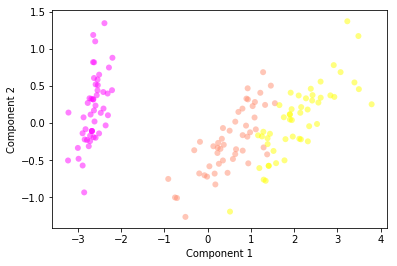

In [20]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=iris.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spring', 10))
plt.ylabel('Component 2')
plt.xlabel('Component 1')

### Clustering
KMeans encuentra los k-clusters (k-grupos) basado en la selección azar de un individuo de cada cluster (centroides). Cada individuo se asigna al cluster cuyo centroide esta más cercano. Este nuevo representante del grupo se convierte en la media de todos los individuos asignados a él.


> Si usted no tiene el paquete ipywidgets instalado, por favor instálelo corriendo la siguiente celda sin comentar.

In [21]:
!pip install ipywidgets

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from ipywidgets import interact
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components = 2) # mantenga 2 componentes para que ayuden a explicar la mayor varianza
X = pca.fit_transform(X)

X.shape

(150, 2)

In [25]:
# Se le debe indicar a KMeans cuántos centroides quiero
n_clusters  = 3

# Para resultados mas consistentes cuando se ejecuten los métodos listados en la siguiente celda
random_state = 2

<p style="text-align:right"><i>El código en la siguiente celda fue basado en el código de Jake VanderPlas [Aquí](https://github.com/jakevdp/sklearn_pycon2015)</i></p>

In [26]:
def _kmeans_step(frame=0, n_clusters=n_clusters):
    rng = np.random.RandomState(random_state)
    labels = np.zeros(X.shape[0])
    centers = rng.randn(n_clusters, 2)

    nsteps = frame // 3

    for i in range(nsteps + 1):
        old_centers = centers
        if i < nsteps or frame % 3 > 0:
            dist = euclidean_distances(X, centers)
            labels = dist.argmin(1)

        if i < nsteps or frame % 3 > 1:
            centers = np.array([X[labels == j].mean(0)
                                for j in range(n_clusters)])
            nans = np.isnan(centers)
            centers[nans] = old_centers[nans]


    # graficar los datos y los centroides
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                vmin=0, vmax=n_clusters - 1);
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                c=np.arange(n_clusters),
                s=200, cmap='rainbow')
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                c='black', s=50)

    # graficar los nuevos centroides en el tercer marco
    if frame % 3 == 2:
        for i in range(n_clusters):
            plt.annotate('', centers[i], old_centers[i], 
                         arrowprops=dict(arrowstyle='->', linewidth=1))
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(n_clusters),
                    s=200, cmap='rainbow')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)

    plt.xlim(-4, 5)
    plt.ylim(-2, 2)
    plt.ylabel('PC 2')
    plt.xlabel('PC 1')

    if frame % 3 == 1:
        plt.text(4.5, 1.7, "1. Reassign points to nearest centroid",
                 ha='right', va='top', size=8)
    elif frame % 3 == 2:
        plt.text(4.5, 1.7, "2. Update centroids to cluster means",
                 ha='right', va='top', size=8)

KMeans utliza el <i>Esperanza-Maximización</i> algoritmo que funciona de la siguiente manera: 

1. Centro del grupo supuesto
* Asignar los puntos al grupo más cercano
* Colocar los centros del grupo al la media de los puntos
* Repetir 1-3 hasta que converger los puntos

In [27]:
# Suprimir advertencias futuras
# import warnings
# warnings.filterwarnings('ignore')

min_clusters, max_clusters = 1, 6
interact(_kmeans_step, frame=[0, 20],
                    n_clusters=[min_clusters, max_clusters])

interactive(children=(Dropdown(description='frame', options=(0, 20), value=0), Dropdown(description='n_cluster…

<function __main__._kmeans_step(frame=0, n_clusters=3)>

> <b>Advertencia</b>! No hay garantía abosulta de garantizar la recuperación de los datos reales. Primero, elegir la cantidad de grupos correcta es difícil. Segundo, el algoritmo es sensitivo a la inicialización, sin embargo, scikit-learn emplea muchos trucos para mitigar los diferentes problemas<br>  --Tomado de los documentos de klearn

<img src='imgs/pca1.png' alt="Original PCA with Labels" align="center">

### Novelty detection aka Detección de Anomalías:
PREGUNTA RÁPIDA:
Cuál es la diferencia entre una detección de un valor extremo y una detección de anamolías.
A continuación se utilizará un one-class SVM para decidir si el punto es extraño o no dado los datos originales. (El código fue basado en los documentos de sklearn [Aquí](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#example-svm-plot-oneclass-py))

/Users/zobando/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0.5,0,'sepal width (cm)\nerror train: 10/200 ; errors novel regular: 3/40 ; errors novel abnormal: 1/10')

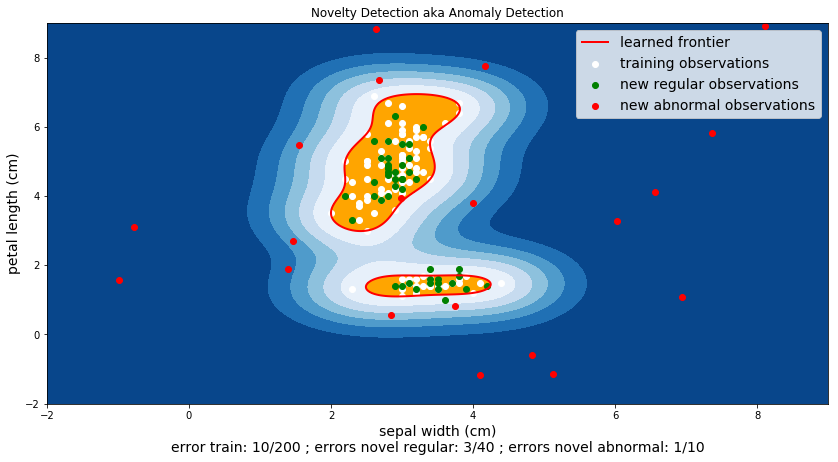

In [28]:
%matplotlib inline
from matplotlib import rcParams, font_manager
rcParams['figure.figsize'] = (14.0, 7.0)
fprop = font_manager.FontProperties(size=14)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

xx, yy = np.meshgrid(np.linspace(-2, 9, 500), np.linspace(-2,9, 500))

# Dataset Iris
iris = load_iris()
X, y = iris.data, iris.target
labels = iris.feature_names[1:3]
X = X[:, 1:3]

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# crear algunos valores extremos
X_weird = np.random.uniform(low=-2, high=9, size=(20, 2))

# Ajustar el modelo
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=1, random_state = 0)
clf.fit(X_train)

# predecir las etiquetas
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_weird)


n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


# graficar la línea, los puntos y el vector más cercano al plano
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection aka Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_weird[:, 0], X_weird[:, 1], c='red')
plt.axis('tight')
plt.xlim((-2, 9))
plt.ylim((-2, 9))
plt.ylabel(labels[1], fontsize = 14)
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="best",
           prop=fprop)
plt.xlabel(
    "%s\nerror train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/10"
    % (labels[0], n_error_train, n_error_test, n_error_outliers), fontsize = 14)


Trate de cambiar el valor de los parámetros en el algoritmo SVM Classifier arriba, especialmente el parámetro `gamma`.  Más información de `gamma` y SVM Classifiers [Aquí](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

Creado por un empleado de Microsoft.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris